# YoloDiffusion for Publish

Yolo v5 + StableDiffusion(img2img) for **colab only**

### !!!! 주의 !!!! 런타임 유형 gpu로 수정할 것

In [1]:
!nvidia-smi

Mon Jan  1 16:47:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0              23W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

구글 드라이브에 마운트해서 쓸 경우

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


알아서 설치할 주소로 바꾸면 됩니다

In [3]:
%cd ./drive/MyDrive/ColabNotebooks/YoloDiffusion

/content/drive/MyDrive/ColabNotebooks/YoloDiffusion


Yolo v5 다운

In [4]:
!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


Stable Diffusion 다운

In [5]:
!git clone https://github.com/CompVis/stable-diffusion.git

fatal: destination path 'stable-diffusion' already exists and is not an empty directory.


Yolo v5 필요 라이브러리 다운

In [6]:
%cd yolov5
%pwd

# yolo
%pip install -qr requirements.txt comet_ml

# gpt
%pip install openai

# stable diffusion
%pip install diffusers==0.11.1
%pip install transformers scipy ftfy accelerate

/content/drive/MyDrive/ColabNotebooks/YoloDiffusion/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.8/586.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.7/514.7 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

학습을 위한 데이터셋 다운 (제작단계에서 쓴 코드로 실행할 필요 없음)

In [ ]:
# !wget http://images.cocodataset.org/zips/val2017.zip -O coco_val2017.zip

--2023-10-13 20:11:15--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.60.217, 52.217.89.196, 52.216.134.251, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.60.217|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘coco_val2017.zip’

coco_val2017.zip    100%[===================>] 777.80M  38.3MB/s    in 21s     

2023-10-13 20:11:36 (36.5 MB/s) - ‘coco_val2017.zip’ saved [815585330/815585330]



이하동문

In [ ]:
# from zipfile import ZipFile, BadZipFile
# import os
# def extract_zip_file(extract_path):
#     try:
#         with ZipFile(extract_path+".zip") as zfile:
#             zfile.extractall(extract_path)
#         # remove zipfile
#         zfileTOremove=f"{extract_path}"+".zip"
#         if os.path.isfile(zfileTOremove):
#             os.remove(zfileTOremove)
#         else:
#             print("Error: %s file not found" % zfileTOremove)
#     except BadZipFile as e:
#         print("Error:", e)
# extract_val_path = "./coco_val2017"
# extract_zip_file(extract_val_path)

# 핵심 요소 파악 딥러닝 구조 제작 단계 (실행 x)
# 바로 YoloDiffusion Start 페이지로 가시면 됩니다.


In [ ]:
import os

dir_path = './coco_val2017/val2017'
res = []

# Iterate directory
for file_path in os.listdir(dir_path):
    # check if current file_path is a file
    if os.path.isfile(os.path.join(dir_path, file_path)):
        # add filename to list
        res.append(file_path)
print(len(res))

5000


YOLOv5 🚀 v7.0-225-gbb9706e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv5 🚀 v7.0-225-gbb9706e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 


Setup complete ✅ (8 CPUs, 51.0 GB RAM, 27.0/166.8 GB disk)


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/ColabNotebooks/YoloDiffusion/yolov5/coco_val2017/val2017/000000180135.jpg: 640x448 1 person, 1 skateboard, 8.4ms
Speed: 0.7ms pre-process, 8.4ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to ../exp


[0.3933933973312378, 0.4869999885559082, 0.7207207083702087, 0.9739999771118164]
w: 0.721, h: 0.974
[0.4234234094619751, 0.8429999947547913, 0.5705705881118774, 0.27799999713897705]
w: 0.571, h: 0.278
wmean: 0.6459999999999999, hmean: 0.626
[['person', 0.45, 0.721, 0.974, 0.393, 0.487, 2, 0], ['skateboard', 0.451, 0.571, 0.278, 0.423, 0.843, 2, 36]]

Data: [['person', 0.45, 0.721, 0.974, 0.393, 0.487, 2, 0], ['skateboard', 0.451, 0.571, 0.278, 0.423, 0.843, 2, 36]]


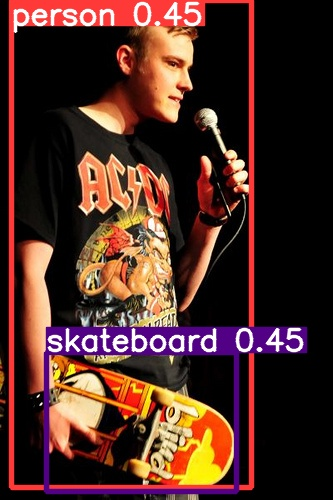

In [ ]:
import imp_detect
import pickle
import utils
display = utils.notebook_init()

# save = 0
tmp = None
# 데이터 로드
with open('save.pkl', 'rb') as f:
  save = pickle.load(f)
  tmp = save
  save += 1

# 데이터 저장
with open('save.pkl', 'wb') as f:
	pickle.dump(save,f)

fileroute = f'./coco_val2017/val2017/{res[tmp]}'
data = imp_detect.run(source=fileroute,project='../')
print(f"\nData: {data}")

exp_route = f"../exp/{res[tmp]}"
display.Image(filename=exp_route,width=600)

In [ ]:
data

[['person', 0.45, 0.721, 0.974, 0.393, 0.487, 2, 0],
 ['skateboard', 0.451, 0.571, 0.278, 0.423, 0.843, 2, 36]]

In [ ]:
for i in data:
  if i[0] == 'person' or i[0] == 'dog':
    i[0] = 1
  else:
    i[0] = 0

print(len(data))

2


In [ ]:
# data[-1][0] = 1
data

[[1, 0.45, 0.721, 0.974, 0.393, 0.487, 2, 0],
 [1, 0.451, 0.571, 0.278, 0.423, 0.843, 2, 36]]

In [ ]:
import pickle

temp = []

# 데이터 로드
with open('data.pkl', 'rb') as f:
  temp = pickle.load(f)
  for i in data:
    temp.append(i)
  print(len(temp))

# 데이터 저장
with open('data.pkl', 'wb') as f:
	pickle.dump(temp,f)


1001


In [ ]:
learn_rate = 0.01
start_patience = 200
start_epoch = 500

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
import keras

import numpy as np
import matplotlib.pyplot as plt
import pickle

dataset = None
with open('data.pkl','rb') as f:
  dataset = pickle.load(f)

print(len(dataset))
# print(dataset)

train = dataset[:801]
trainX = []
trainY = []
for instance in train:
  trainX.append(instance[1:7])
  if instance[0] == 1:
    trainY.append([1,0])
  elif instance[0] == 0:
    trainY.append([0,1])

test = dataset[801:]
testX = []
testY = []
for instance in test:
  testX.append(instance[1:7])
  if instance[0] == 1:
    testY.append([1,0])
  elif instance[0] == 0:
    testY.append([0,1])

np_trainX = np.array(trainX)
np_trainY = np.array(trainY)

model = Sequential()
model.add(Dense(6, input_shape=(6,),activation='relu'))
model.add(Dense(6, input_shape=(6,),activation='relu'))
model.add(Dense(2,activation='softmax'))

optimizer = keras.optimizers.Adam(learning_rate=learn_rate)
model.compile(loss='mean_squared_error', optimizer=optimizer)
model.summary()

early_stop = EarlyStopping(monitor='loss',patience=start_patience,verbose=0)
history = model.fit(trainX, trainY, epochs=start_epoch,batch_size=32, verbose=1, callbacks=[early_stop])

1001
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6)                 42        
                                                                 
 dense_10 (Dense)            (None, 6)                 42        
                                                                 
 dense_11 (Dense)            (None, 2)                 14        
                                                                 
Total params: 98 (392.00 Byte)
Trainable params: 98 (392.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
26/26 [==============================] - 1s 3ms/step - loss: 0.2613
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 0.1460
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 0.1297
Epoch 4/500
26/26 [==================

In [ ]:
predictY = model.predict(testX)
print(len(predictY)," == ", len(testX))

totally_right = 0
wrong_prediction = 0
couldnt_predict = 0
wrong_right =0
for i in range(len(predictY)):
  if predictY[i][0] >=  0.5 and testY[i][0] == 1:
    totally_right += 1

  if predictY[i][0] >= 0.5 and testY[i][0] == 0:
    wrong_prediction += 1

  if predictY[i][0] < 0.5 and testY[i][0] == 1:
    couldnt_predict += 1

  if predictY[i][0] < 0.5 and testY[i][0] == 0:
    wrong_right += 1

print(f"totally_right: {round(totally_right,3)}")
print(f"wrong_prediction: {round(wrong_prediction,3)}")
print(f"couldn't predict: {round(couldnt_predict,3)}")
print(f"wrong_right: {round(wrong_right,3)}")


7/7 [==============================] - 0s 2ms/step
200  ==  200
totally_right: 32
wrong_prediction: 6
couldn't predict: 7
wrong_right: 155


In [ ]:
import shutil
def Save_Model(name):
  try:
    model.save(f'./saved_model/{name}')
  except:
    shutil.rmtree(f'./saved_model/{name}')
    model.save(f'./saved_model/{name}')

Save_Model("Mark1")

# YoloDiffusion Start

filename: 저장할 파일 이름 (.jpg 파일 권유)

url: img2img에 쓰일 이미지 주소

input_prompt: 입력할 프롬프트

user_input_strength: 이미지 생성 강도

In [7]:
filename = "test.jpg"
url = "https://www.foodbusinessnews.net/ext/resources/2020/4/CoupleAtRestaurant_Lead.jpg?height=667&t=1587991293&width=1080"
input_prompt = " painterly, oil on canvas"
user_input_strength = 0.75

Yolo를 통한 사물 인식

YOLOv5 🚀 v7.0-225-gbb9706e Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)


Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.3/166.8 GB disk)


YOLOv5 🚀 v7.0-225-gbb9706e Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded


[0.08191808313131332, 0.782608687877655, 0.1118881106376648, 0.27286356687545776]
w: 0.112, h: 0.273
[0.4985015094280243, 0.6101949214935303, 0.15784215927124023, 0.16791604459285736]
w: 0.158, h: 0.168
[0.03746253624558449, 0.5277361273765564, 0.042957041412591934, 0.104947529733181]
w: 0.043, h: 0.105
[0.7312687039375305, 0.669415295124054, 0.12387612462043762, 0.1034482792019844]
w: 0.124, h: 0.103
[0.040459539741277695, 0.4422788619995117, 0.07892107963562012, 0.15292353928089142]
w: 0.079, h: 0.153
[0.5919080972671509, 0.41304346919059753, 0.046953048557043076, 0.1064467802643776]
w: 0.047, h: 0.106
[0.440559446811676, 0.4505247473716736, 0.06593406945466995, 0.20239880681037903]
w: 0.066, h: 0.202
[0.44205793738365173, 0.7541229128837585, 0.13086913526058197, 0.08395802229642868]
w: 0.131, h: 0.084
[0.807692289352417, 0.4182908535003662, 0.044955044984817505, 0.07196401804685593]
w: 0.045, h: 0.072
[0.48651349544525146, 0.8845577239990234, 0.9730269908905029, 0.23088455200195312]

image 1/1 /content/drive/MyDrive/ColabNotebooks/YoloDiffusion/test.jpg: 448x640 8 persons, 1 cup, 2 forks, 1 spoon, 2 chairs, 2 dining tables, 76.5ms
Speed: 0.6ms pre-process, 76.5ms inference, 698.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to ../exp


[['chair', 0.285, 0.112, 0.273, 0.082, 0.783, 16, 56], ['dining table', 0.324, 0.158, 0.168, 0.499, 0.61, 16, 60], ['cup', 0.337, 0.043, 0.105, 0.037, 0.528, 16, 41], ['fork', 0.383, 0.124, 0.103, 0.731, 0.669, 16, 42], ['person', 0.401, 0.079, 0.153, 0.04, 0.442, 16, 0], ['person', 0.404, 0.047, 0.106, 0.592, 0.413, 16, 0], ['person', 0.411, 0.066, 0.202, 0.441, 0.451, 16, 0], ['fork', 0.456, 0.131, 0.084, 0.442, 0.754, 16, 42], ['person', 0.472, 0.045, 0.072, 0.808, 0.418, 16, 0], ['dining table', 0.482, 0.973, 0.231, 0.487, 0.885, 16, 60], ['spoon', 0.493, 0.106, 0.072, 0.722, 0.661, 16, 44], ['chair', 0.586, 0.125, 0.352, 0.937, 0.759, 16, 56], ['person', 0.627, 0.082, 0.151, 0.571, 0.487, 16, 0], ['person', 0.686, 0.088, 0.147, 0.491, 0.463, 16, 0], ['person', 0.839, 0.439, 0.619, 0.312, 0.588, 16, 0], ['person', 0.842, 0.461, 0.687, 0.706, 0.544, 16, 0]]

Data: [['chair', 0.285, 0.112, 0.273, 0.082, 0.783, 16, 56], ['dining table', 0.324, 0.158, 0.168, 0.499, 0.61, 16, 60], ['cup

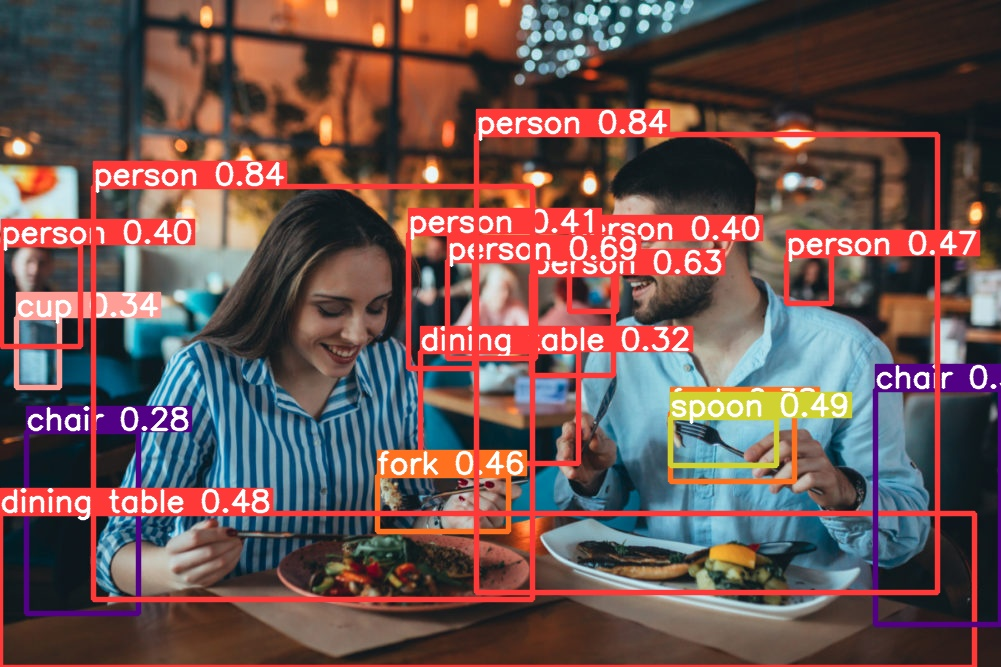

In [8]:
import requests
import imp_detect
import pickle
import utils
import tensorflow as tf
display = utils.notebook_init()

fileroute = f"../{filename}"
data = requests.get(url).content

f = open(fileroute,'wb')
f.write(data)
f.close()
data = imp_detect.run(source=fileroute,project='../')
print(f"\nData: {data}")

exp_route = f"../exp/{filename}"
display.Image(filename=exp_route,width=600)

핵심 사물 선별 및 프롬프트 수정단계

In [9]:
### Focus ANN ###
image_testX = []
for instance in data:
  image_testX.append(instance[1:7])

model = tf.keras.models.load_model(f"./saved_model/Mark1")
y_pred = model.predict(image_testX)


important = []
ann_prompt = ""

flag = False
for i in range(len(y_pred)):
  if y_pred[i][0] > 0.5:
    print(f"{data[i][0]}: important {round(float(y_pred[i][0]) * 100,3)}%")
    important.append(data[i])
    tmp = f"There is {data[i][0]}. "
    ann_prompt += tmp
    flag = True

if not flag:
  print("nothing important")

concat_prompt = ann_prompt + input_prompt
print(concat_prompt)

for_gpt_prompt =f"Can you make a nice img2img prompt with this sentence? '{concat_prompt}'"
print(for_gpt_prompt)

1/1 [==============================] - 1s 708ms/step
dining table: important 60.591%
person: important 60.591%
person: important 60.591%
There is dining table. There is person. There is person.  painterly, oil on canvas
Can you make a nice img2img prompt with this sentence? 'There is dining table. There is person. There is person.  painterly, oil on canvas'


문자열화 + concat 단계

[    0.04267    0.041825    0.035463    0.040185     0.04112    0.038111    0.043056    0.042713     0.03935     0.11786    0.042713    0.063212    0.051599    0.054844     0.14555     0.15973]
[   0.060169    0.060162    0.059737    0.059939    0.059936    0.059767    0.059974    0.059947    0.059738    0.066471    0.059871    0.061204    0.060111    0.060178     0.07492    0.077875]
[   0.048884    0.048274    0.046284    0.049143     0.05018    0.049378    0.051516    0.052511    0.052393     0.09843    0.053978    0.064983    0.062136    0.065777     0.10053      0.1056]


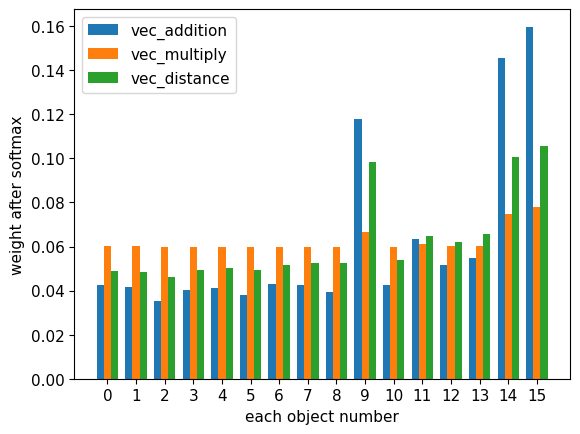

In [11]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def softmax(x):
    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x

vec_addition = []
vec_multiply = []
vec_distance = []
for instance in data:
  vec_addition.append(instance[1] + instance[2] + instance[3])
  vec_multiply.append(instance[1] * instance[2] * instance[3])
  vec_distance.append(math.dist(instance[1:4],[0,0,0]))

print(softmax(vec_addition))
print(softmax(vec_multiply))
print(softmax(vec_distance))

import matplotlib.pyplot as plt

width=0.25
x = [i for i in range(len(data))]
d1=softmax(vec_addition)
d2=softmax(vec_multiply)
d3=softmax(vec_distance)

def plot3graphs(x, d1, d2, d3, width):

    plt.xticks(x)

    x1 = [e-1.5*width for e in x]
    plt.bar(x1,d1,width,align='edge')

    x2 = [e-0.5*width for e in x]
    plt.bar(x2,d2,width,align='edge')

    x3 = [e+0.5* width for e in x]
    plt.bar(x3,d3,width,align='edge')

    plt.legend(('vec_addition','vec_multiply','vec_distance'))
    plt.xlabel('each object number')
    plt.ylabel('weight after softmax')

plot3graphs(x, d1, d2, d3, width)
plt.show()

실험 단계

In [17]:
# yolo_prompt = ""
# weighted_prompt = ""

# tmp = None
# for i in range(len(data)):
#   if d1[i] > 0.5:
#     tmp = f"There is ({data[i][0]}:{round(d1[i]/0.1,3)}). "
#     weighted_prompt += tmp
#   # else:
#   #   tmp = f"There is ({data[i][0]}:0.001). "
#   #   weighted_prompt += tmp

# concat_prompt = weighted_prompt + input_prompt
# print(concat_prompt)

# for_gpt_prompt =f"Can you make a nice img2img prompt with this sentence? '{concat_prompt}'"
# print(for_gpt_prompt)

 painterly, oil on canvas
Can you make a nice img2img prompt with this sentence? ' painterly, oil on canvas'


In [12]:
!pip install --upgrade openai
!pip install typing-extensions --upgrade

OpenAI ChatGPT Api key:
개인적인 키 넘버를 넣으시기 바랍니다

In [16]:
from openai import OpenAI

client = OpenAI(api_key="INSERT_YOUR_OPENAI_KEY")

response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Can you make a nice img2img prompt with this sentence? 'There is a (dog:1.5). fantasy mood, trending in artstation.' The prompt must not be too long. few '()' can be ignore"},
        {"role": "assistant", "content": "Design a fantasy-inspired image with a trending ArtStation vibe, showcasing a (dog:1.5) in a mystical setting."},
        {"role": "user", "content": for_gpt_prompt}
  ]
)

final_prompt = response.choices[0].message.content
print(final_prompt)

Create a painterly image with an oil on canvas aesthetic, featuring a dining table and two individuals.


프롬프트 적용된 YoloDiffusion img2img 단계

이미지 1개 출력

text_encoder/pytorch_model.fp16.safetensors not found


Fetching 29 files:   0%|          | 0/29 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/37 [00:00<?, ?it/s]

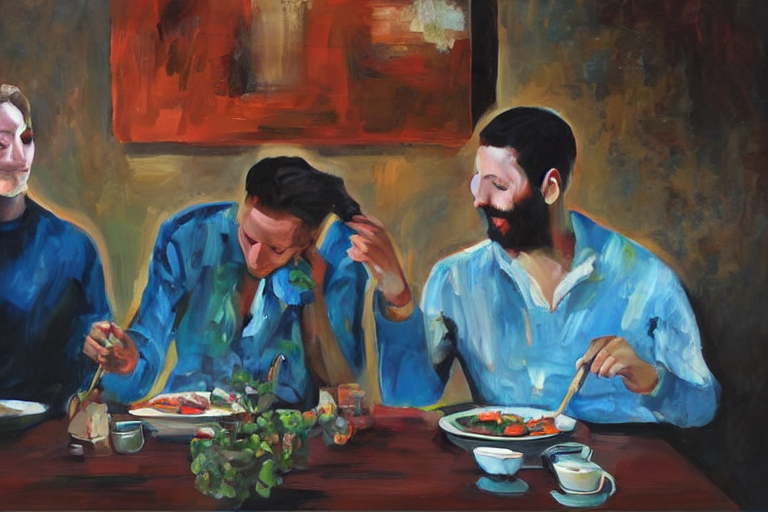

In [18]:
import requests
import torch
from PIL import Image
from io import BytesIO

from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda"
model_id_or_path = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id_or_path, torch_dtype=torch.float16)
pipe = pipe.to(device)

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((768, 512))

images = pipe(prompt=final_prompt, image=init_image, strength=user_input_strength, guidance_scale=7.5, num_inference_steps = 50).images
exitroute = f"../result/{filename}"
images[0].save(exitroute)
images[0]

변형된 사진 3개씩 출력하고자 하는 경우

  0%|          | 0/37 [00:00<?, ?it/s]

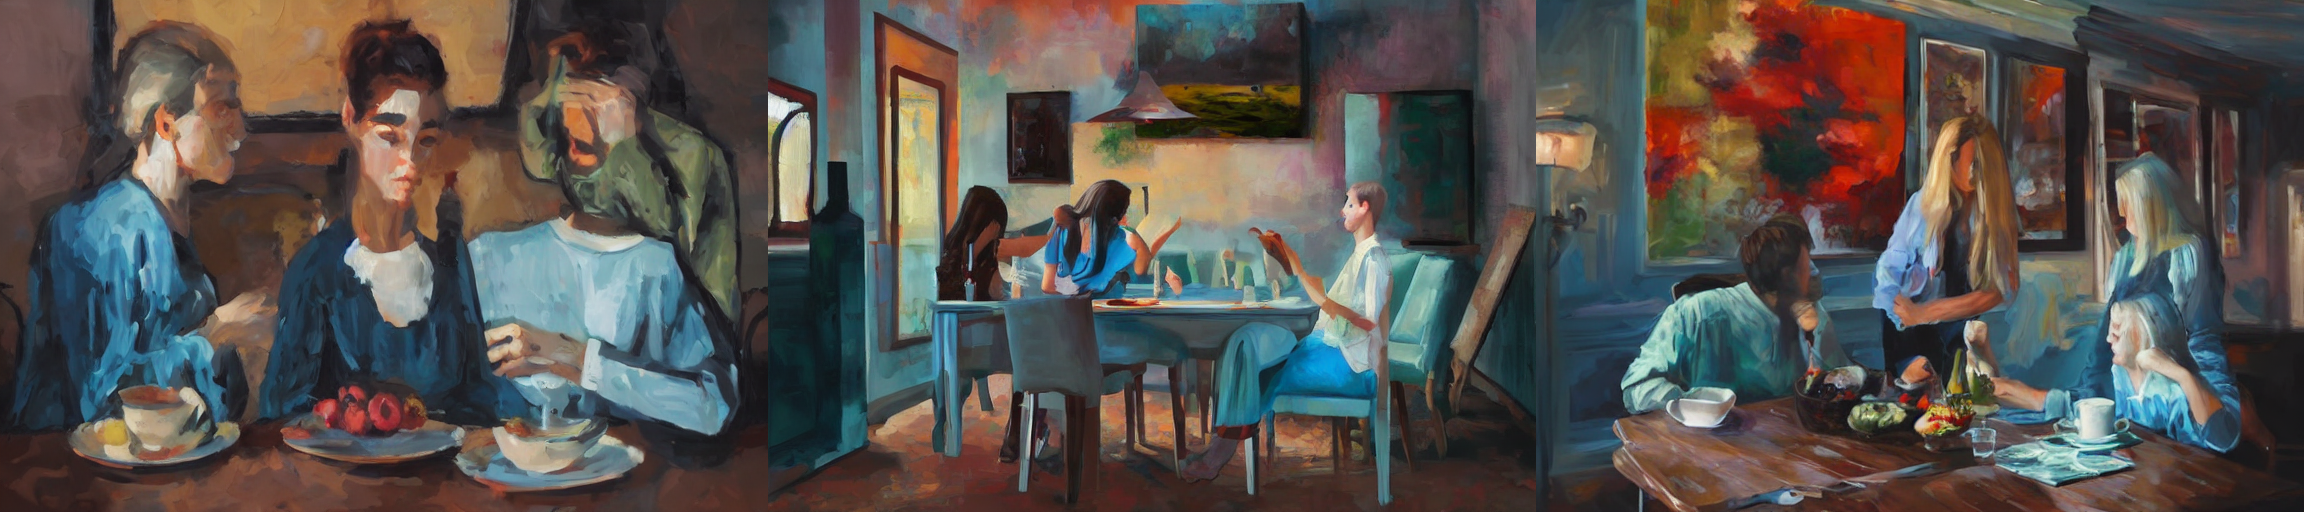

In [19]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

num_images = 3
prompt = [final_prompt] * num_images

images = pipe(prompt=prompt, image=init_image, strength=user_input_strength, guidance_scale=7.5,num_inference_steps = 50).images

grid = image_grid(images, rows=1, cols=3)
grid
